In [58]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import numpy as np
from BinaryImage import BinaryImage
from SimulatedAnnealing import SimulatedAnnealing
from IPython.display import HTML

## Zadanie 2 - Obraz binarny

Wygeneruj losowy obraz binarny o rozmiarze $n x n $ i wybranej gęstości $δ$ czarnych punktów $δ = 0.1,0.3,0.4$. Korzystając z różnego typu sąsiedztwa (4-sąsiadów,  8-sąsiadów, 8-16-sąsiadów) zaproponuj funkcję energii (np. w bliskiej odległości te same kolory przy-ciągają się, a w dalszej odpychają się) i dokonaj jej minimalizacji za pomocą algorytmu symulowanego wyżarzania. W jaki sposób można generować stany sąsiednie? Jak różnią się uzyskane wyniki w zależności od rodzaju sąsiedztwa, wybranej funkcji energii i szybkości spadku temperatury?

#### Sposób generowania stanów sąsiednich

Stany sąsiednie można generować poprzez wylosowanie dwóch punktów o różnych kolorach i ich zamianę.

#### Definiowanie sąsiedztwa i funkcji energii

Sąsiedztwo i funkcja energii jest definiowana przez podanie listy krotek, gdzie pierwsze dwie pozycję oznaczają przesunięcie w wierszach i kolumnach, natomiast na trzeciej pozycji podawana jest liczba oznaczająca o ile zmieni się energia układu, gdy na pozycji o podanym przesunięciu względem danego czarnego punktu znajduje się inny czarny punkt.

## Testy dla 4 sąsiadów

$ δ $ = 0.3
Funkcja sąsiedztwa faworyzująca 'szachownicę'

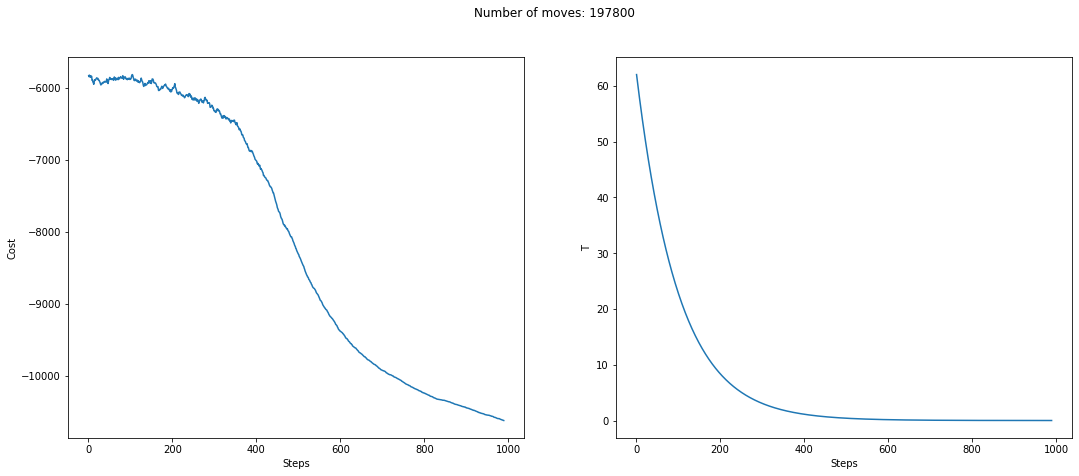

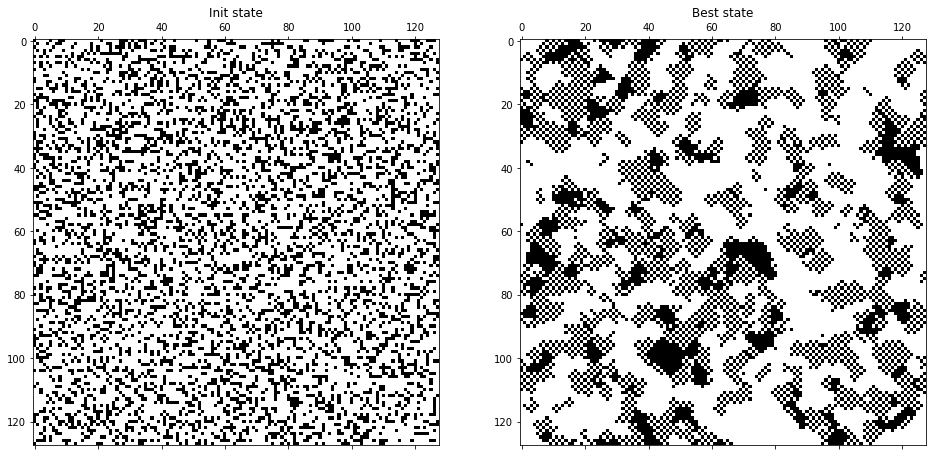

In [108]:
%autoreload
neighborhood = [(-1, -1, -1), (-1, 1, -1), (1, -1, -1), (1, 1, -1)]

bi = BinaryImage(128, 0.3, neighborhood)
t_0 = SimulatedAnnealing.init_temperature(bi, 100)
sa = SimulatedAnnealing(bi, T=10 * t_0, T_min=0.003, n=200, alfa=0.99, stop=-np.inf)
animation = sa.optimize(save_animation=True, iterations_per_frame=100)
HTML(animation.to_jshtml())

$ δ $ = 0.4
Funkcja sąsiedztwa faworyzująca skupiska punktów

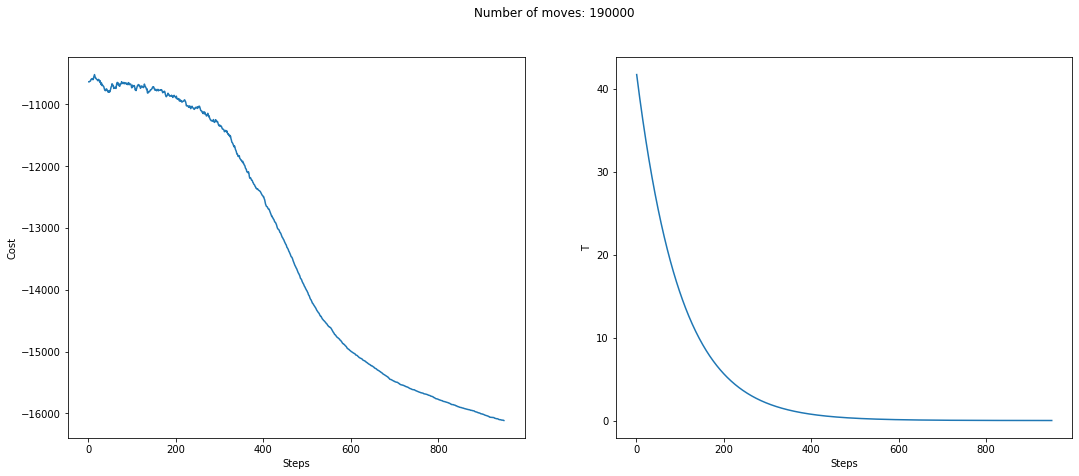

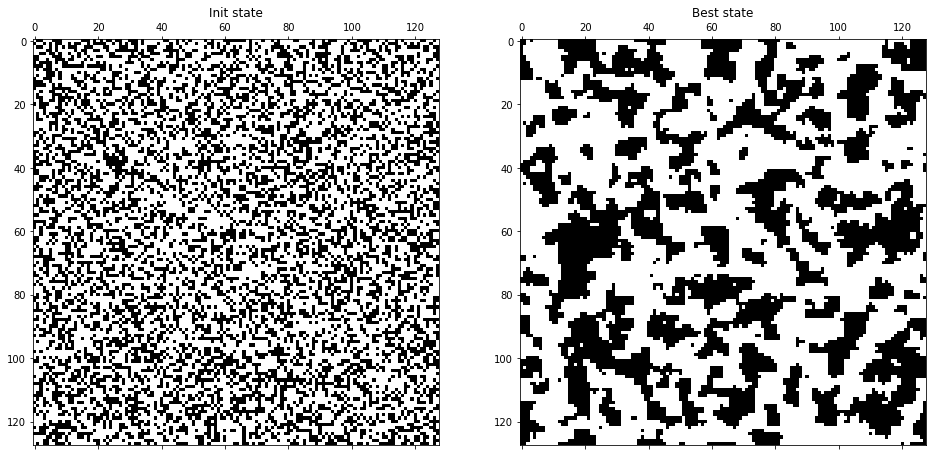

In [125]:
%autoreload
neighborhood = [(-1, 0, -1), (0, -1, -1), (1, 0, -1), (0, 1, -1)]

bi = BinaryImage(128, 0.4, neighborhood)
t_0 = SimulatedAnnealing.init_temperature(bi, 100)
sa = SimulatedAnnealing(bi, T=10 * t_0, T_min=0.003, n=200, alfa=0.99, stop=-np.inf)
animation = sa.optimize(save_animation=True, iterations_per_frame=100)
HTML(animation.to_jshtml())

$ δ $ = 0.1
Funkcja sąsiedztwa faworyzująca poziome linie

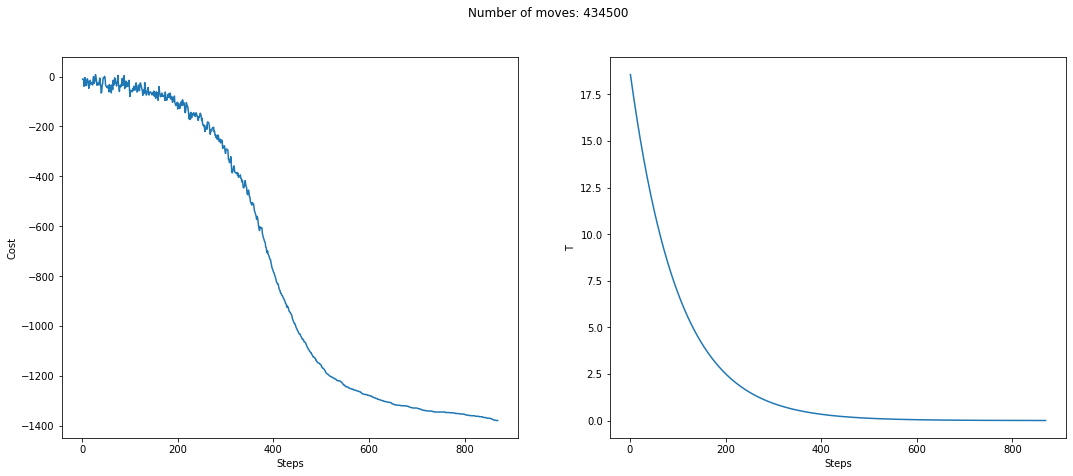

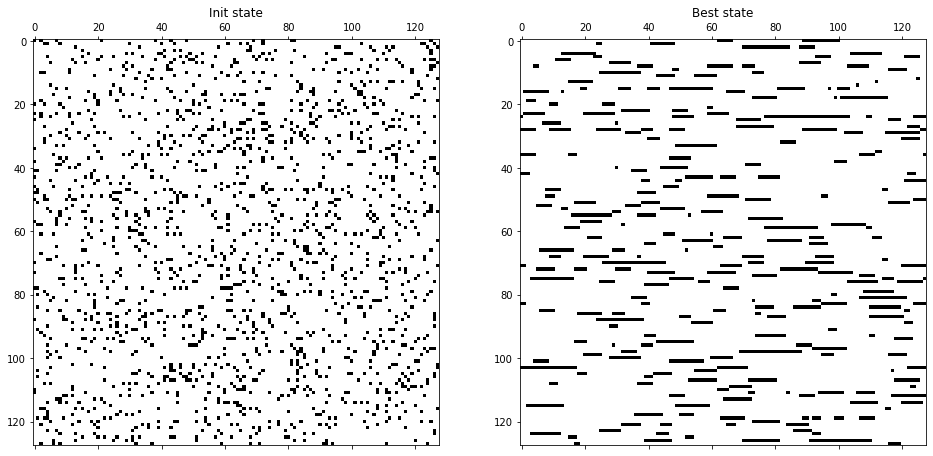

In [128]:
%autoreload
neighborhood = [(0, -1, -1), (1, 0, 1), (0, 1, -1), (-1, 0, 1)]

bi = BinaryImage(128, 0.1, neighborhood)
t_0 = SimulatedAnnealing.init_temperature(bi, 100)
sa = SimulatedAnnealing(bi, T=10 * t_0, T_min=0.003, n=500, alfa=0.99, stop=-np.inf)
animation = sa.optimize(save_animation=True, iterations_per_frame=100)
HTML(animation.to_jshtml())

## Testy dla 8 sąsiadów

$ δ $ = 0.1
Funkcja sąsiedztwa faworyzująca odseparowane punkty

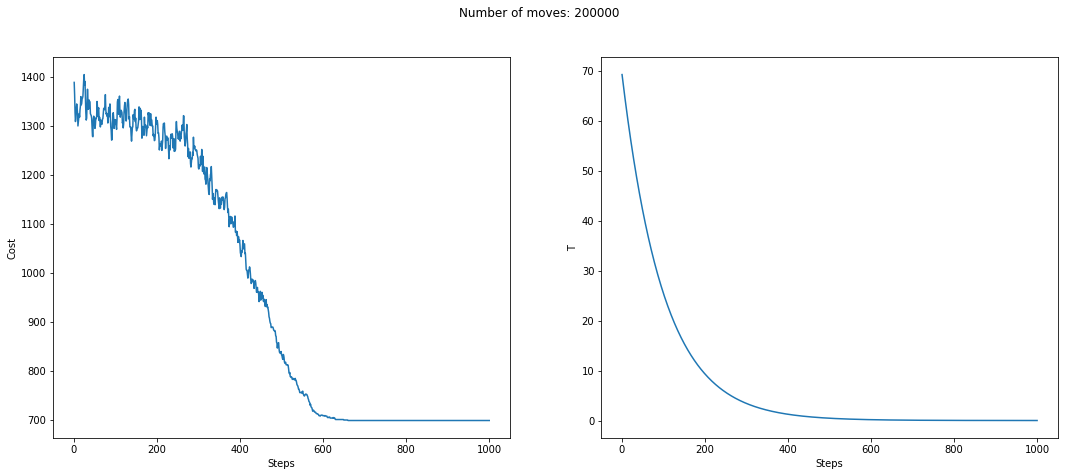

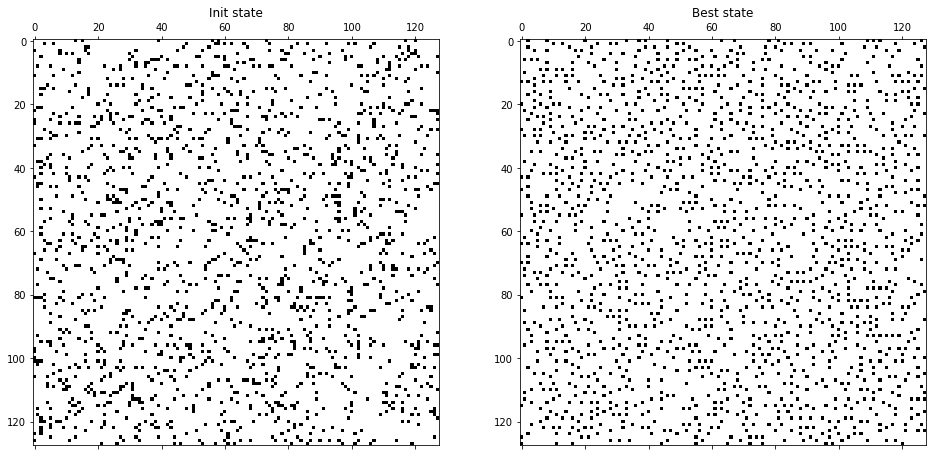

In [61]:
%autoreload
neighborhood = [(-1, -1, 1), (0, -1, 1), (1, -1, 1),
                (-1,  0, 1),             (1,  0, 1),
                (-1,  1, 1), (0,  1, 1), (1,  1, 1)]

bi = BinaryImage(128, 0.1, neighborhood)
t_0 = SimulatedAnnealing.init_temperature(bi, 100)
sa = SimulatedAnnealing(bi, T=10 * t_0, T_min=0.003, n=200, alfa=0.99, stop=-np.inf)
animation = sa.optimize(save_animation=True, iterations_per_frame=100)
HTML(animation.to_jshtml())

$ δ $ = 0.4
Funkcja sąsiedztwa faworyzująca odseparowane punkty

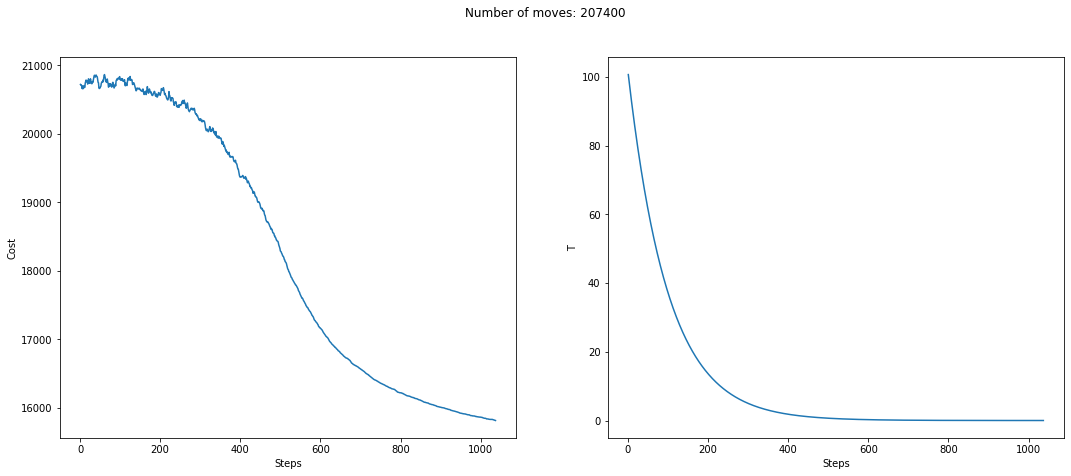

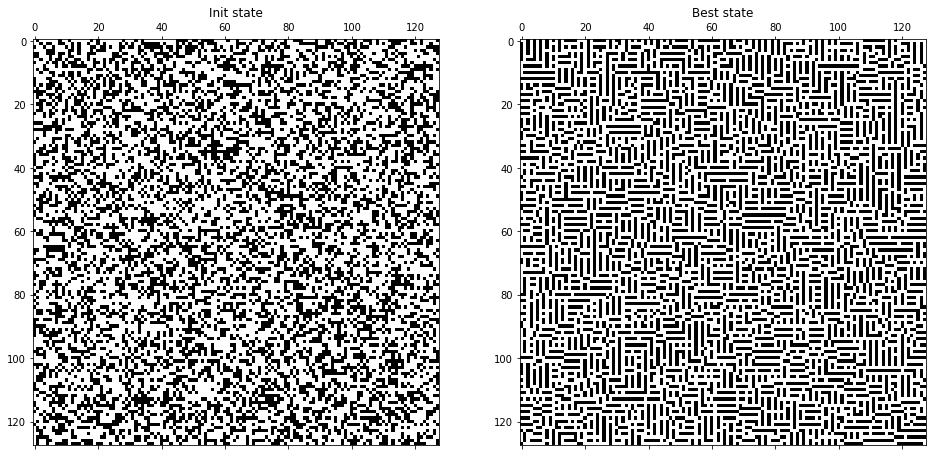

In [62]:
%autoreload
neighborhood = [(-1, -1, 1), (0, -1, 1), (1, -1, 1),
                (-1,  0, 1),             (1,  0, 1),
                (-1,  1, 1), (0,  1, 1), (1,  1, 1)]

bi = BinaryImage(128, 0.4, neighborhood)
t_0 = SimulatedAnnealing.init_temperature(bi, 100)
sa = SimulatedAnnealing(bi, T=10 * t_0, T_min=0.003, n=200, alfa=0.99, stop=-np.inf)
animation = sa.optimize(save_animation=True, iterations_per_frame=100)
HTML(animation.to_jshtml())

$ δ $ = 0.4
Funkcja sąsiedztwa faworyzująca skupiska punktów

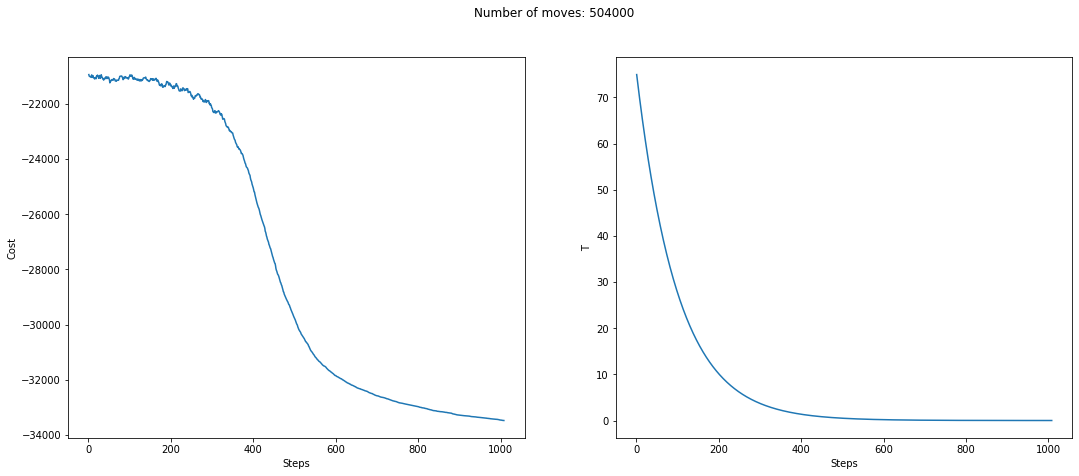

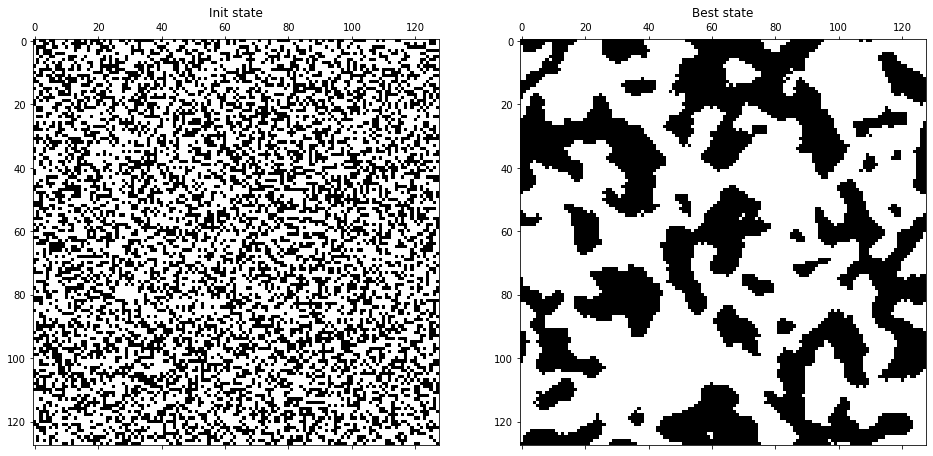

In [64]:
%autoreload
neighborhood = [(-1, -1, -1), (0, -1, -1), (1, -1, -1),
                (-1,  0, -1),              (1,  0, -1),
                (-1,  1, -1), (0,  1, -1), (1,  1, -1)]

bi = BinaryImage(128, 0.4, neighborhood)
t_0 = SimulatedAnnealing.init_temperature(bi, 100)
sa = SimulatedAnnealing(bi, T=10 * t_0, T_min=0.003, n=500, alfa=0.99, stop=-np.inf)
animation = sa.optimize(save_animation=True, iterations_per_frame=100)
HTML(animation.to_jshtml())

$ δ $ = 0.2
Funkcja sąsiedztwa: przyciąganie w odległości 1, odpychanie w odległości 3

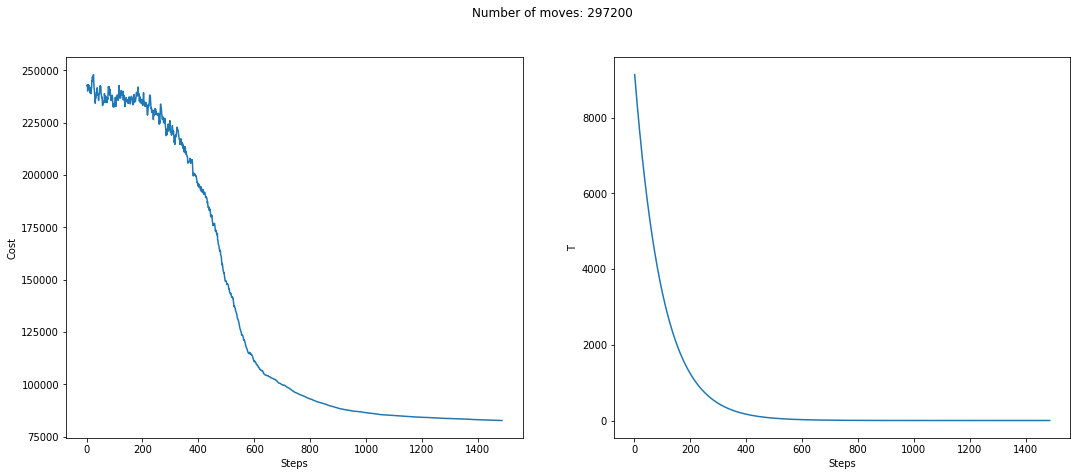

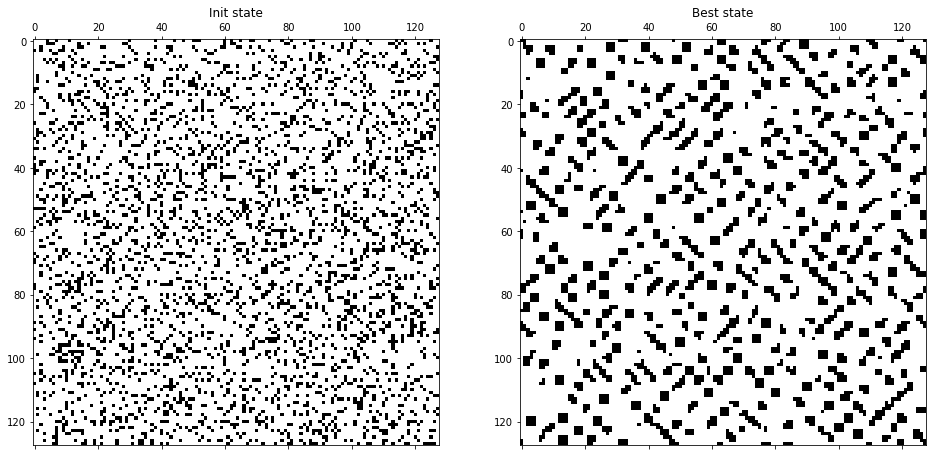

In [80]:
%autoreload
neighborhood = [(-3, 0, 100), (0, -3, 100), (3, 0, 100), (0, 3, 100),
                (-1, 0, -10), (0, -1, -10), (1, 0, -10), (0, 1, -10)]

bi = BinaryImage(128, 0.2, neighborhood)
t_0 = SimulatedAnnealing.init_temperature(bi, 100)
sa = SimulatedAnnealing(bi, T=10 * t_0, T_min=0.003, n=200, alfa=0.99, stop=-np.inf)
animation = sa.optimize(save_animation=True, iterations_per_frame=100)
HTML(animation.to_jshtml())

$ δ $ = 0.2
Funkcja sąsiedztwa faworyzująca ustawienie na skos

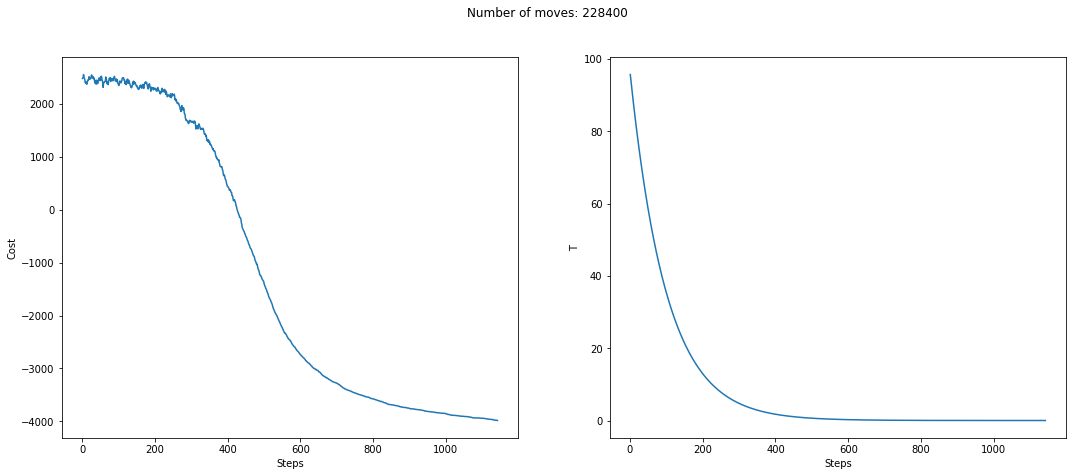

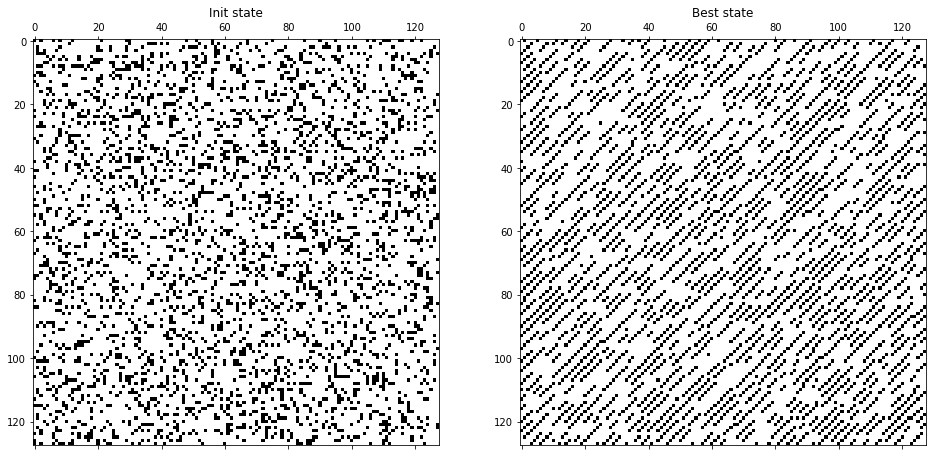

In [84]:
%autoreload
neighborhood = [(-1, -1,  2), (0, -1, 1), (1, -1, -2),
                (-1,  0,  1),             (1,  0,  1),
                (-1,  1, -2), (0,  1, 1), (1,  1,  2)]

bi = BinaryImage(128, 0.2, neighborhood)
t_0 = SimulatedAnnealing.init_temperature(bi, 100)
sa = SimulatedAnnealing(bi, T=10 * t_0, T_min=0.001, n=200, alfa=0.99, stop=-np.inf)
animation = sa.optimize(save_animation=True, iterations_per_frame=100)
HTML(animation.to_jshtml())

$ δ $ = 0.3
Funkcja sąsiedztwa faworyzująca 'szachownicę'

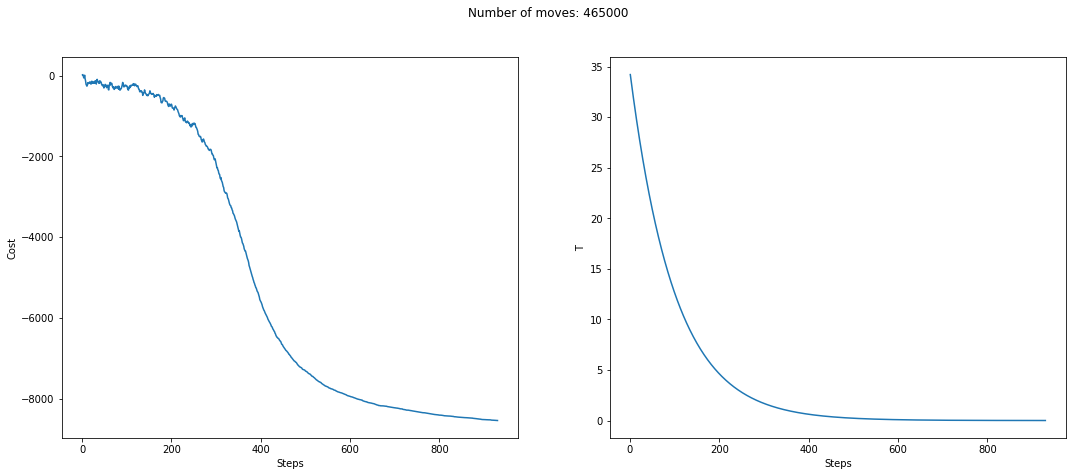

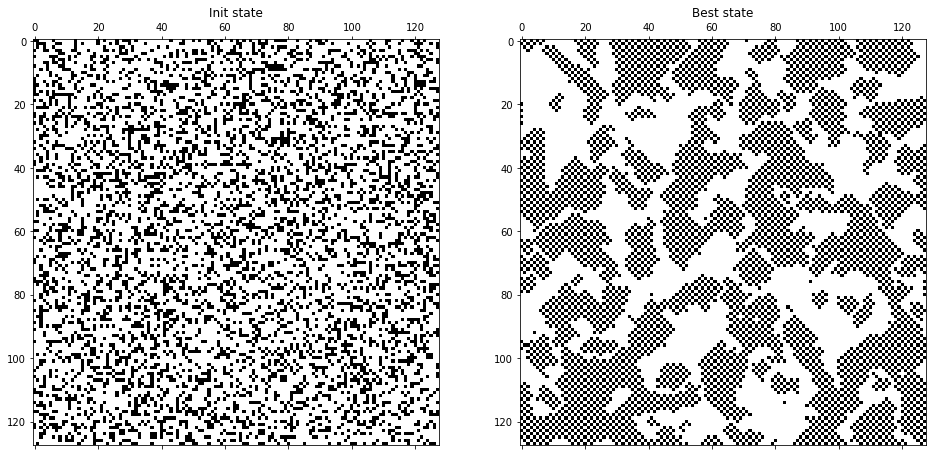

In [112]:
%autoreload
neighborhood = [(-1, -1, -1), (0, -1, 1), (1, -1, -1),
                (-1,  0,  1),             (1,  0,  1),
                (-1,  1, -1), (0,  1, 1), (1,  1, -1)]

bi = BinaryImage(128, 0.3, neighborhood)
t_0 = SimulatedAnnealing.init_temperature(bi, 100)
sa = SimulatedAnnealing(bi, T=10 * t_0, T_min=0.003, n=500, alfa=0.99, stop=-np.inf)
animation = sa.optimize(save_animation=True, iterations_per_frame=100)
HTML(animation.to_jshtml())

## Testy dla 8-16 sąsiadów

$ δ $ = 0.4
Funkcja sąsiedztwa faworyzująca 'szachownicę'

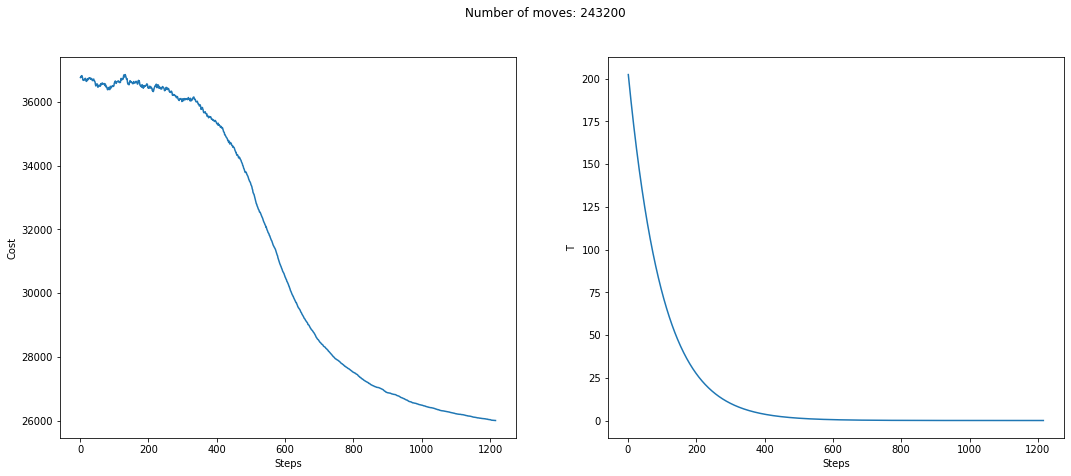

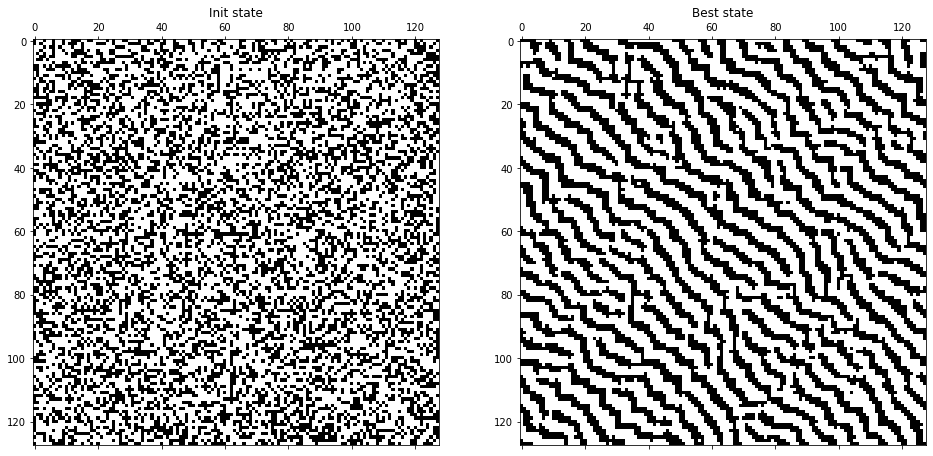

In [147]:
%autoreload
neighborhood = [(-1, 1, 1), (-1, 2, 1), (-2, 1, 1), (-2, 2, 1), (-2, 3, 1), (-3, 2, 1), (-3, 3, 1),
                (1, -1, 1), (1, -2, 1), (2, -1, 1), (2, -2, 1), (2, -3, 1), (3, -2, 1), (3, -3, 1)]

bi = BinaryImage(128, 0.4, neighborhood)
t_0 = SimulatedAnnealing.init_temperature(bi, 100)
sa = SimulatedAnnealing(bi, T=20 * t_0, T_min=0.001, n=200, alfa=0.99, stop=-np.inf)
animation = sa.optimize(save_animation=True, iterations_per_frame=100)
HTML(animation.to_jshtml())

$ δ $ = 0.2
Funkcja sąsiedztwa faworyzująca kwadraty 2x2

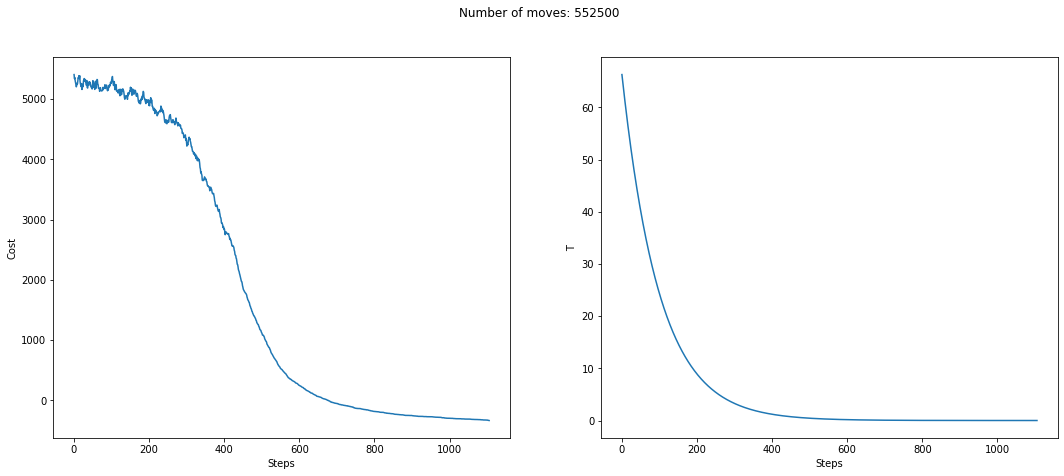

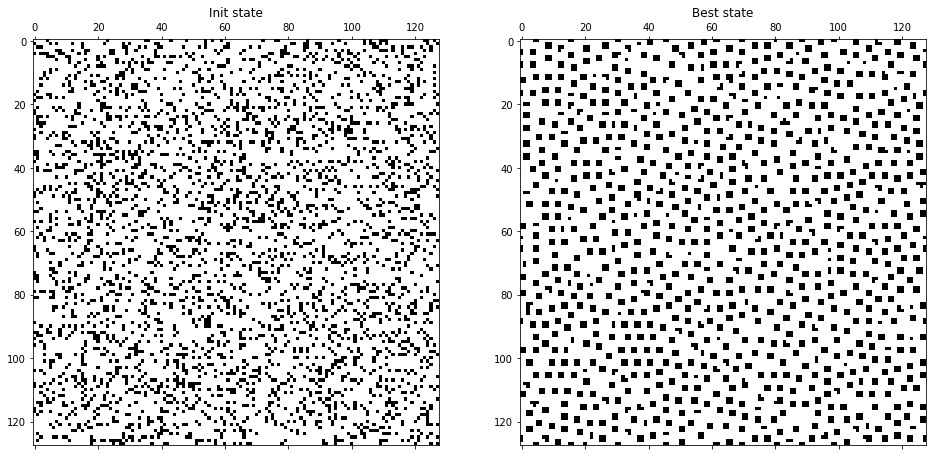

In [150]:
%autoreload
neighborhood = [(0, -1, -1), (-1, 0, -1), (0, 1, -1), (1, 0, -1),
                (-2, -1, 1), (-2, 0, 1), (-2, 1, 1),
                ( 2, -1, 1), ( 2, 0, 1), ( 2, 1, 1),
                (-1, -2, 1), (0, -2, 1), (1, -2, 1),
                (-1,  2, 1), (0,  2, 1), (1,  2, 1)]

bi = BinaryImage(128, 0.2, neighborhood)
t_0 = SimulatedAnnealing.init_temperature(bi, 100)
sa = SimulatedAnnealing(bi, T=10 * t_0, T_min=0.001, n=500, alfa=0.99, stop=-np.inf)
animation = sa.optimize(save_animation=True, iterations_per_frame=100)
HTML(animation.to_jshtml())

## Jak różnią się uzyskane wyniki w zależności od rodzaju sąsiedztwa i wybranej funkcji energi?

Sąsiedztwo i funkcja energii mają wpływ na funkcję kosztu danego układu. Funkcja kosztu jest minimalizowana za pomocą symulowanego wyżarzania, zatem od funkcji energii zależy jak będzie wyglądał obraz po zminimalizowaniu. Dobierając odpowiednio tę funkcję wraz z sąsiedztwem możemy sprawić, że pewne kształy/ustawienia punktów na obrazie będą faworyzowane.

## Jak różnią się uzyskane wyniki w zależności od spadku temperatury?

Spadek temperatury ma wpływ na to jak długo i z jakim prawdopodobieństwem akceptowane będą stany gorsze od aktualnego. Gdy temperatura jest bliska zeru algorytm akcpetuje praktycznie tylko stany o mniejszymm koszcie, zatem aby algorytm nie utknął w minimum lokalnym musimy odpowiednio dobrać temperaturę początkową i spadek temperatury. Najlepsze rezultaty udało mi się uzyskać przy funkcji spadku $T(n+1) = 0,99 * T(n)$, natomiast jako temperaturę początkową przyjąłem wariancję kosztu po wykonaniu kilku zamian na układzie początkowym, przemnożoną przez pewną wyznaczoną doświadczalnie stałą.